<a href="https://colab.research.google.com/github/vkumar61/MAT421/blob/main/Module%20B%20Section%2017.4%20-%2017.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lagrange and Newton Interpolation

Both of these interpolation schemes are based on the same principle: determining the polynomial that perfectly describes the data as a whole. In the previous section, we discussed linear and cubic spline interpolation based on interpolating local behavior. Here, we shift that thinking to a global scale. To make this consideration, the "user" should have a good reason to expect a global relation to the data. Then, you simply perform a polynomial fit using the respective formulas:

1) **Lagrange Interpolation:**
$$
L(x) = \sum_{i=1}^{n} y_i \cdot P_i(x)
$$

where each Lagrange basis polynomial $P_i(x)$ is defined as:

$$
P_i(x) = \prod_{j=1, j\neq i}^{n} \frac{x - x_j}{x_i - x_j}
$$

2) **Newton Interpolation:**

$$
f(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)(x - x_1) + \ldots + a_n(x - x_0)(x - x_1)\ldots(x - x_{n-1})
$$

where $a_0, a_1, \ldots, a_n$ are the divided differences, and $x_0, x_1, \ldots, x_n$ are the data points. The divided differences can be computed recursively:

$$
a_0 = f[x_0], \quad
a_1 = f[x_0, x_1], \quad
a_2 = f[x_0, x_1, x_2], \quad
\ldots, \quad
a_n = f[x_0, x_1, \ldots, x_n]
$$

and $f[\cdot]$ is defined as:

$$
f[x_1, x_0] = \frac{y_1 - y_0}{x_1 - x_0}
\\
\ldots
\\
f[x_0, x_1, \ldots, x_k] = \frac{f[x_1, x_2, \ldots, x_k] - f[x_0, x_1, \ldots, x_{k-1}]}{x_k - x_0}
$$

There are two very interesting results that are inherent to the design of these formulas. The first is that, due to "interpolation," all data is perfectly described. I.e., any pair $(x_i, y_i)$ is a point on the found polynomial. This is rather trivial to check by plugging in any arbitrary data point and computing the non-zero terms. The second, which is not as self-evident, is that the polynomials found by both methods are exactly the same. This can be shown by either expanding out both formulas or arguing that a polynomial of degree n-1 that crosses n data points is unique.

Here, as assumed in the textbook, we choose the order of the polynomial to be one less than the number of data points so that the interpolating polynomial can be determined explicitly. Now, technically, you can use both these methods to find higher-order polynomials that are underdetermined by the data, but this will lead to a number of undetermined coefficients in the final polynomial and result in a family of "solutions." It is once again possible to show that the families are equivalent but requires some extra consideration.

Since, as almost always with interpolation, once you have the theory defined, it is simply about computing/'plug and chug.' I will perform both Lagrange and Newton interpolation on the same data and show that they are equivalent. In both cases, I take inspiration for the code from the textbook.

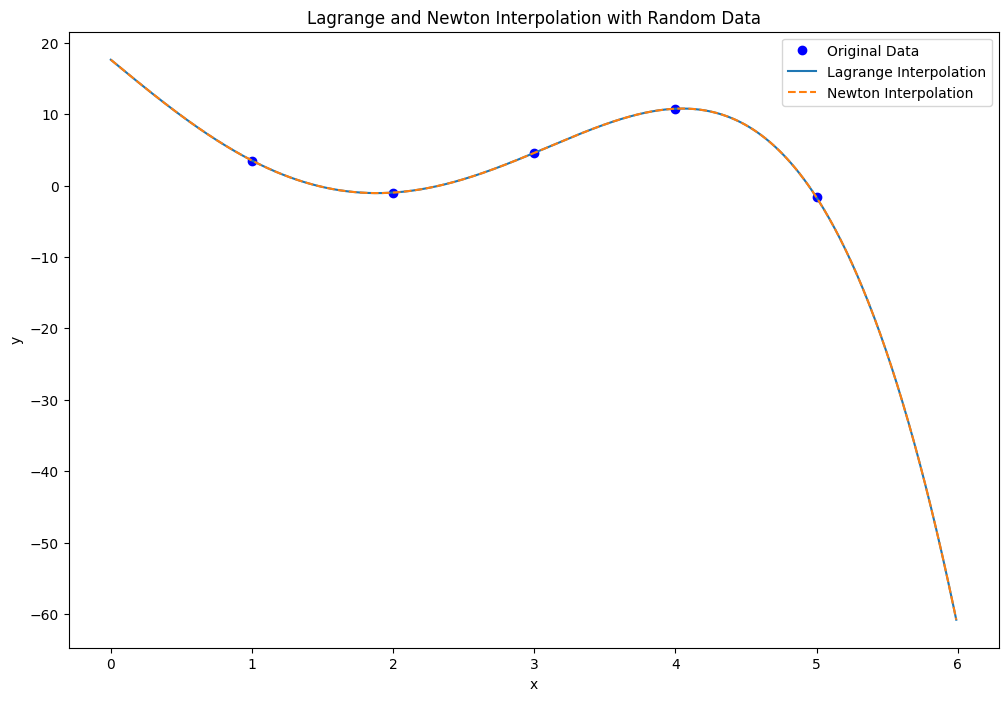

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x, y, x_interp):
    result = 0
    n = len(x)

    for i in range(n):
        term = y[i]
        for j in range(n):
            if j != i:
                term *= (x_interp - x[j]) / (x[i] - x[j])
        result += term

    return result

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k]) * p
    return p

# Generate random data
np.random.seed(42)
x = np.array([1, 2, 3, 4, 5])
y = np.random.normal(loc=0, scale=np.sqrt(50), size=len(x))

# get the divided difference coef for Newton interpolation
a_s = divided_diff(x, y)[0, :]

# evaluate Newton interpolation on new data points
x_new = np.arange(np.min(x) - 1, np.max(x) + 1, 0.01)
y_new_newton = newton_poly(a_s, x, x_new)

# evaluate Lagrange interpolation on new data points
y_new_lagrange = [lagrange_interpolation(x, y, xi) for xi in x_new]

#plot both of them and see they are the same
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'bo', label='Original Data')
plt.plot(x_new, y_new_lagrange, label='Lagrange Interpolation')
plt.plot(x_new, y_new_newton, label='Newton Interpolation', linestyle = "dashed")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange and Newton Interpolation with Random Data')
plt.show()